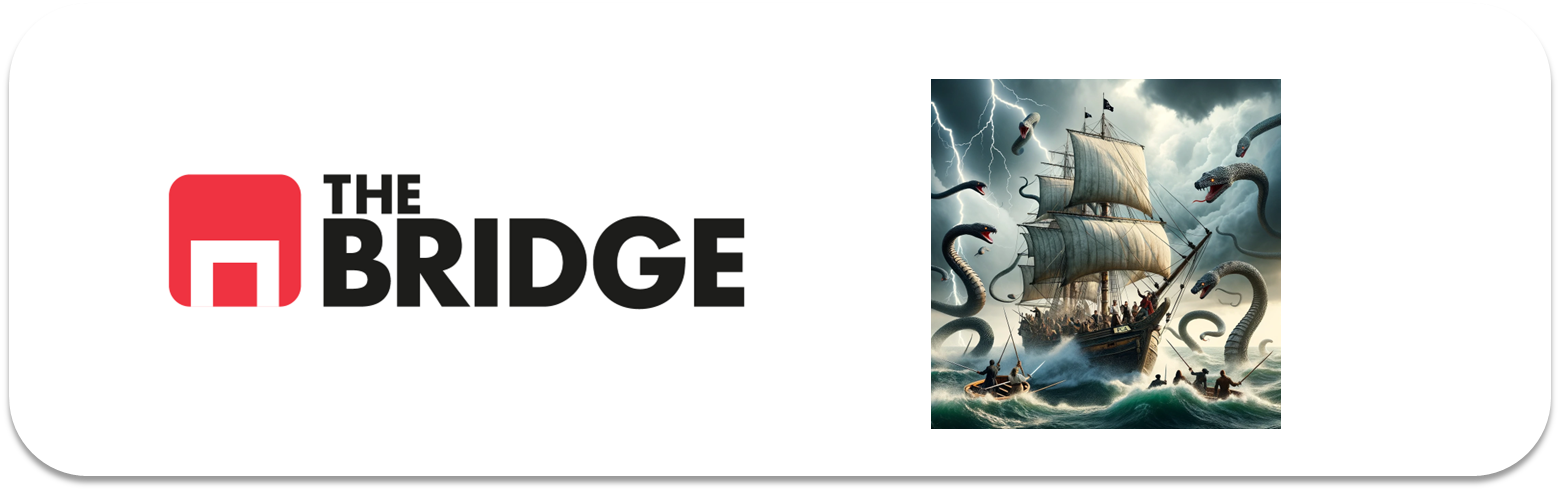

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [30]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [19]:
df = pd.read_csv("./data/credit_npo.csv")

In [20]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [21]:
df.drop("NumberOfDependents",inplace=True,axis = 1)

In [22]:

df.drop("MonthlyIncome",inplace=True,axis = 1)

In [23]:

df.value_counts("NumberOfTimes90DaysLate")#0 , menos de 5 mas de 5
df.value_counts("NumberRealEstateLoansOrLines")#0 menos de 3 mas de 3
df.value_counts("NumberOfTime60-89DaysPastDueNotWorse") #0 menos de 5 mas de 5
df.value_counts("NumberOfOpenCreditLinesAndLoans") #menos de 10, menos de 25 mas de 25

NumberOfOpenCreditLinesAndLoans
7     1148
6     1087
8     1037
5     1035
9      977
4      935
10     782
11     732
3      722
12     580
2      547
13     459
1      416
14     368
15     341
16     239
17     217
0      192
18     153
19     129
20     118
21      62
22      61
23      39
24      38
25      30
26      19
27      16
28      13
29      10
30      10
31       7
33       4
32       3
34       2
35       2
36       1
38       1
40       1
41       1
43       1
48       1
49       1
Name: count, dtype: int64

In [24]:
# Clasificar los valores de "NumberOfTimes90DaysLate"
df["NumberOfTimes90DaysLate_Class"] = df["NumberOfTimes90DaysLate"].apply(lambda x: "0" if x == 0 else ("menos de 5" if x < 5 else "mas de 5"))

# Clasificar los valores de "NumberRealEstateLoansOrLines"
df["NumberRealEstateLoansOrLines_Class"] = df["NumberRealEstateLoansOrLines"].apply(lambda x: "0" if x == 0 else ("menos de 3" if x < 3 else "mas de 3"))

# Clasificar los valores de "NumberOfTime60-89DaysPastDueNotWorse"
df["NumberOfTime60-89DaysPastDueNotWorse_Class"] = df["NumberOfTime60-89DaysPastDueNotWorse"].apply(lambda x: "0" if x == 0 else ("menos de 5" if x < 5 else "mas de 5"))

# Clasificar los valores de "NumberOfOpenCreditLinesAndLoans"
df["NumberOfOpenCreditLinesAndLoans_Class"] = df["NumberOfOpenCreditLinesAndLoans"].apply(lambda x: "menos de 10" if x < 10 else ("menos de 25" if x < 25 else "mas de 25"))


In [25]:
df.drop("NumberOfTimes90DaysLate",inplace = True, axis = 1)
df.drop("NumberRealEstateLoansOrLines",inplace = True, axis = 1)
df.drop("NumberOfTime60-89DaysPastDueNotWorse",inplace = True, axis = 1)
df.drop("NumberOfOpenCreditLinesAndLoans",inplace = True, axis = 1)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SeriousDlqin2yrs                            12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines        12537 non-null  float64
 2   age                                         12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse        12537 non-null  int64  
 4   DebtRatio                                   12537 non-null  float64
 5   NumberOfTimes90DaysLate_Class               12537 non-null  object 
 6   NumberRealEstateLoansOrLines_Class          12537 non-null  object 
 7   NumberOfTime60-89DaysPastDueNotWorse_Class  12537 non-null  object 
 8   NumberOfOpenCreditLinesAndLoans_Class       12537 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 881.6+ KB


In [27]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [28]:
target = "SeriousDlqin2yrs"

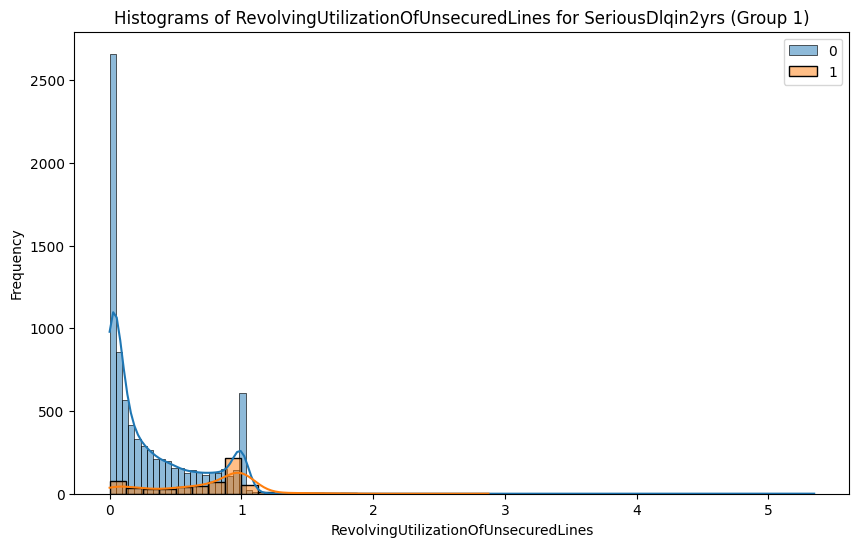

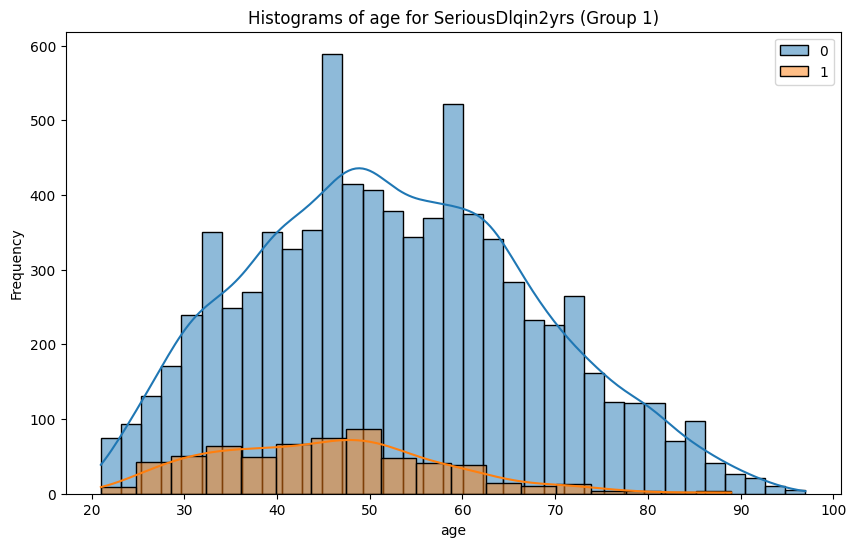

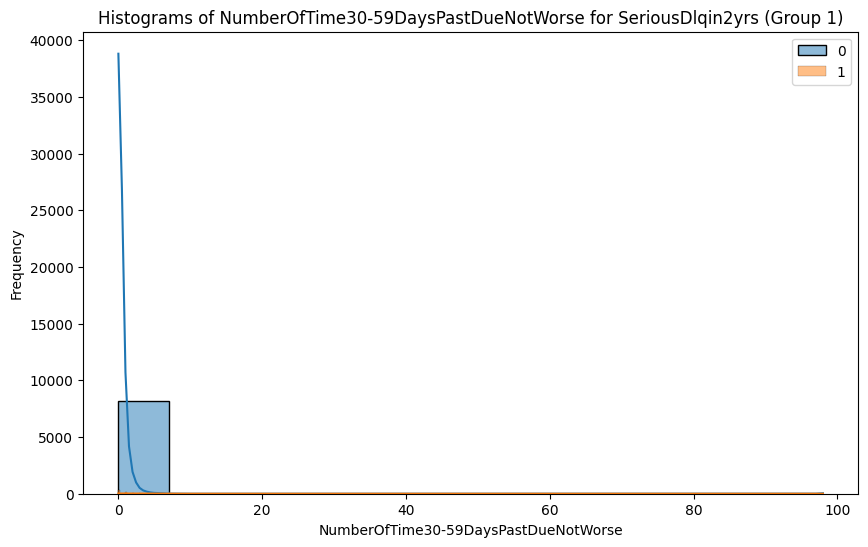

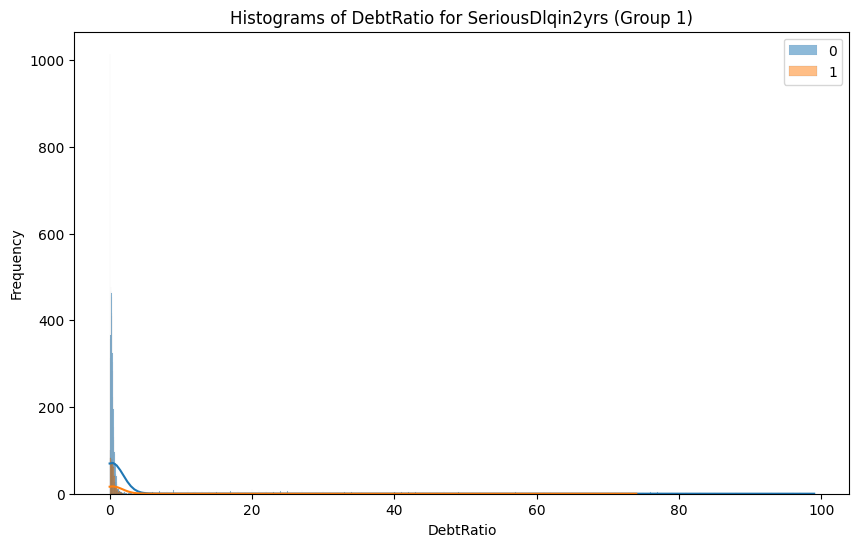

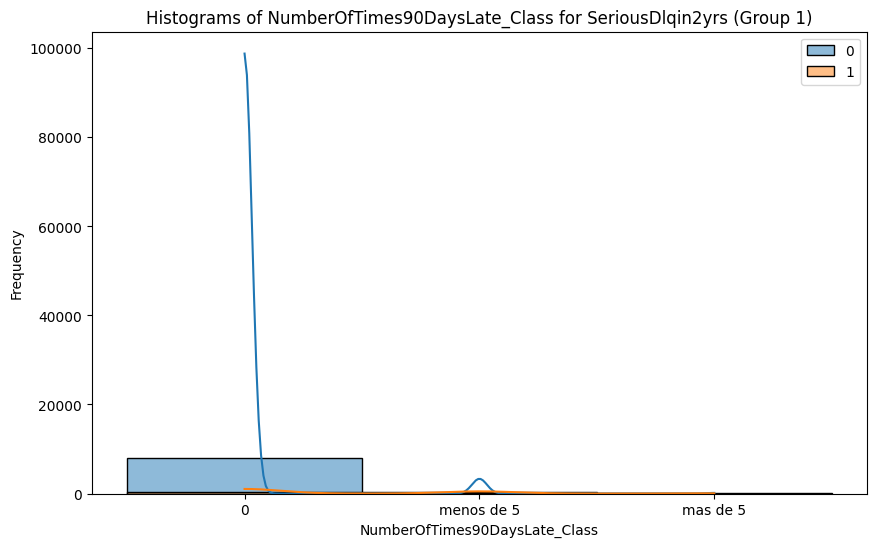

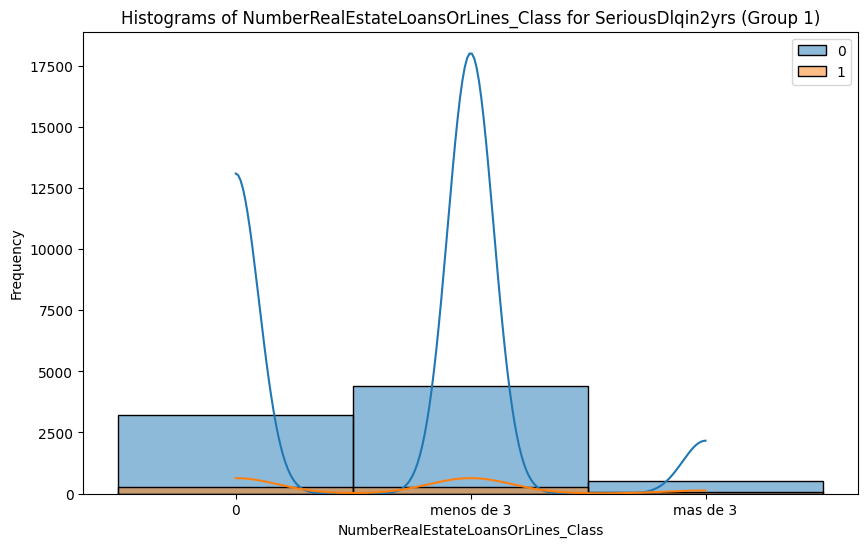

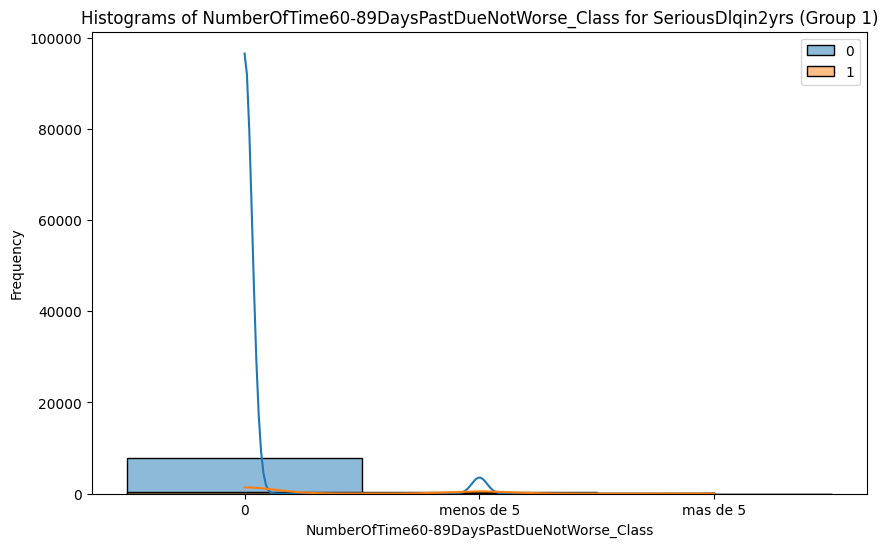

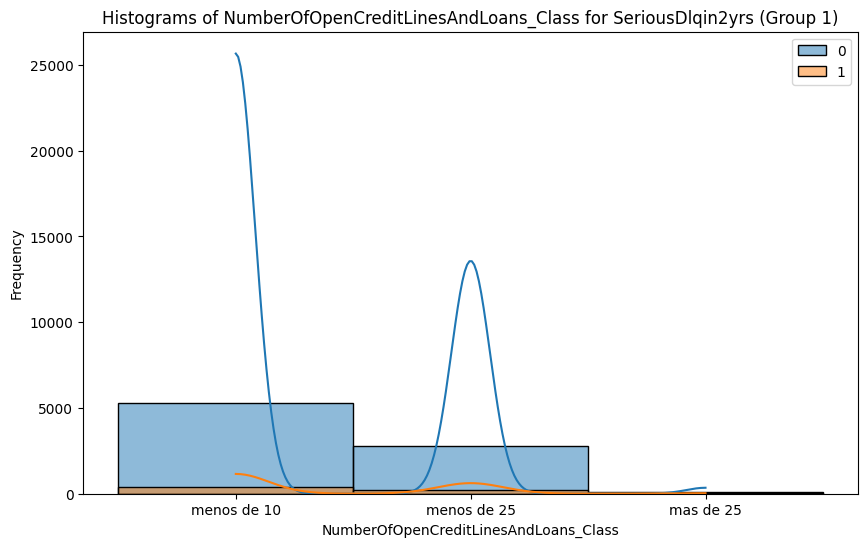

In [29]:
for col in train_set.columns:
    if col != target:
        bt.plot_grouped_histograms(train_set, target, col, group_size = 2)

In [33]:
X_train = train_set.drop("SeriousDlqin2yrs", axis=1)
y_train = train_set["SeriousDlqin2yrs"]


In [37]:


# Supongamos que X es tu conjunto de características (features) y y es tu variable objetivo
# X puede contener tanto características numéricas como categóricas

# Selección de características numéricas utilizando ANOVA (f_classif) con SelectKBest
num_features = 10  # Número de características numéricas a seleccionar
numerical_features = X_train.select_dtypes(include=['int64', 'float64'])  # Seleccionar solo características numéricas
selector_numeric = SelectKBest(score_func=f_classif, k=num_features)
selector_numeric.fit_transform(numerical_features, y_train)
selected_numeric_features = numerical_features.columns[selector_numeric.get_support()]
print(selected_numeric_features)
'''
# Selección de características categóricas utilizando información mutua con SelectKBest
categorical_features = X_train.select_dtypes(include=['object'])  # Seleccionar solo características categóricas
selector_categorical = SelectKBest(score_func=mutual_info_classif, k='all')  # Seleccionar todas las características
selector_categorical.fit_transform(categorical_features, y_train)
selected_categorical_features = categorical_features.columns[selector_categorical.get_support()]
'''
# Ahora tienes las características numéricas seleccionadas en selected_numeric_features
# y las características categóricas seleccionadas en selected_categorical_features


Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio'],
      dtype='object')


"\n# Selección de características categóricas utilizando información mutua con SelectKBest\ncategorical_features = X_train.select_dtypes(include=['object'])  # Seleccionar solo características categóricas\nselector_categorical = SelectKBest(score_func=mutual_info_classif, k='all')  # Seleccionar todas las características\nselector_categorical.fit_transform(categorical_features, y_train)\nselected_categorical_features = categorical_features.columns[selector_categorical.get_support()]\n"

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.